<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="100" /></center>


## **<center>MEDICAL COST PREDICTION</center>**

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Upgrading Libraries**](#Section32)
  - **3.3** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)<br>

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Pre-Profiling Report**](#Section51)<br>
  - **5.2** [**Post-Profiling Report**](#Section52)<br>

**6.** [**Exploratory Data Analysis**](#Section6)<br>
**7.** [**Data Post-Processing**](#Section7)<br>
  - **7.1** [**Feature Extraction**](#Section71)<br>
  - **7.2** [**Feature Transformation**](#Section72)<br>
  - **7.3** [**Feature Scaling**](#Section73)<br>
  - **7.4** [**Data Preparation**](#Section74)<br>

**8.** [**Model Development & Evaluation**](#Section8)<br>
**9.** [**Conclusion**](#Section9)<br>


---
<a name = Section1></a>
# **1. Introduction**
---

- **XYZ Health Insurance Co. Ltd** . is one of the prominent insurance providers in the country.

- They offer impressive health plans and services to cater to the needs of different people..

- The insurance company also provides access to fitness assessment centers, wellness centers, diagnostic centers in addition to hospitalization centers.

---
<a name = Section2></a>
# **2. Problem Statement**
---

The company is planning to introduce a **new system** that will help to easily **monitor and predict** the **medical insurance prices of their customers**.

---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing Libraries**

In [1]:
!pip install -q datascience                                                       # Package that is required by pandas profiling
!pip install -q pandas-profiling  
!pip install sweetviz

ERROR: Invalid requirement: '#'


<a name = Section32></a>
### **3.2 Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync. 

- Make sure not to execute the cell above (3.1) and below (3.2) again after restarting the runtime.



In [2]:
# !pip install -q --upgrade pandas-profiling

<a name = Section33></a>
### **3.3 Importing Libraries**

In [5]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                               # Importing for panel data analysis
from pandas_profiling import ProfileReport                                        # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                                        # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_colwidth', None)                                       # Unfolding the max feature width for better clearity      
pd.set_option('display.max_rows', None)                                           # Unfolding hidden data points if the cardinality is high
pd.set_option('display.float_format', lambda x: '%.5f' % x)                       # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                                # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                                   # Importing pyplot interface using matplotlib                                              
import seaborn as sns                                                             # Importing seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split              # To split the data in training and testing part 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.preprocessing import StandardScaler         # Importing Standard Scaler library from preprocessing. 
from sklearn.preprocessing import LabelEncoder 
from sklearn.linear_model import LinearRegression                                 # Importing Linear Regression model
from sklearn.metrics import mean_squared_error                                    # To calculate the MSE of a regression model
from sklearn.metrics import mean_absolute_error                                   # To calculate the MAE of a regression model
from sklearn.metrics import r2_score                                  # To calculate the R-squared score of a regression model
#Modelin Library
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from scipy import stats
from statsmodels.tools.eval_measures import rmse
import statsmodels.formula.api as smf
from mpl_toolkits.mplot3d import Axes3D

#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                                   # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")     

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

- This data set is being taken from the **INSAID Project Library** for the purpose of **prediction**.


</br>

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 11003 | 8 | 45.0 KB | 

</br>
													

|Id|Feature|Description|
|:--|:--|:--|
|01|**Age**| Age of the Customer |
|02|**Sex**| Sex of the Customer |
|03|**BMI**| Body Mass Index of the Customer |
|04|**Children**| Number of Childerns of the Customer |
|05|**Smoker**| Smoker indication |
|06|**region**| geographical region |
|07|**id**| Id of the customer |
|08|**charges**| Medical expense charges from insurance |
|

**NOTE**: You can use this **[link](https://www.insaid.co/wp-content/uploads/2021/10/Medical-Cost-Prediction.zip)** to download the zip file for data.


In [138]:
df = pd.read_csv(filepath_or_buffer="C:/Users/Mani/Desktop/GCDAI/MACHINE LEARNING/Term 4/Medical-Cost-Prediction/train_data.csv")
print('Data Shape:', df.shape)
df.head()

Data Shape: (1003, 8)


,age,sex,bmi,children,smoker,region,id,charges
0,24,male,23.65500,0,no,northwest,693,2352.96845
1,28,female,26.51000,2,no,southeast,1297,4340.44090
2,51,male,39.70000,1,no,southwest,634,9391.34600
3,47,male,36.08000,1,yes,southeast,1022,42211.13820
4,46,female,28.90000,2,no,southwest,178,8823.27900


<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **description** and **statistics** about the data.

In [82]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1003.00000,39.25523,14.03910,18.00000,27.00000,39.00000,51.00000,64.00000
bmi,1003.00000,30.51178,6.01311,15.96000,26.21000,30.20000,34.43000,53.13000
children,1003.00000,1.10469,1.20462,0.00000,0.00000,1.00000,2.00000,5.00000
id,1003.00000,666.87438,386.57044,0.00000,329.50000,675.00000,1001.50000,1337.00000
charges,1003.00000,13267.93582,12051.35655,1121.87390,4780.83940,9447.38240,16840.66797,62592.87309


**Observations**:

- **Charges** for some customers range from as **low** as a **\$1121** to as **high** as **\$62592**.

- **25% of customers** have charges around **4 to 5 k**.

- **50% of customers** have their charges **more than 9k**.

- **75% of customers** have their charges **less than 17k units**.
- Max BMI value **53.13** appears to be an outlier.
- Age of the customers is in the range of **18 to 64** years.
- On an average, it apppears that, each customer has one child, where


- **More than 50%** of customers have their **charges lower than the average** charges i.e. **\$13267.94**.

<a name = Section42></a>
### **4.2 Data Information**

 - In this section, we will get **information about the data** and see some observations.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1003 non-null   int64  
 1   sex       1003 non-null   object 
 2   bmi       1003 non-null   float64
 3   children  1003 non-null   int64  
 4   smoker    1003 non-null   object 
 5   region    1003 non-null   object 
 6   id        1003 non-null   int64  
 7   charges   1003 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 62.8+ KB


**Observations**:

- Out of 8 features, we have **3 int64 datatype** features(Age, Number of Childern and Id), **3 object type** features (sex, smoker and region), and the **rest are of float64** datatype features.

- We may have to **convert some variables** like BMI into appropriate forms so we can use them for training purposes.

<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

<a name = Section51></a>
### **5.1 Pre Profiling Report**

In [6]:
#profile = ProfileReport(df=df)
#profile.to_file(output_file='Pre Profiling Report.html')
#print(profile.to_file)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<bound method ProfileReport.to_file of >


In [9]:
import sweetviz as svz
sweet_report = svz.analyze(df)
sweet_report.show_html('sweet_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


**Observations**:

- The report shows 8 features with 1003 observations.

- There are 3 categorical and 5 numeric features.

- Age and BMI are **uniform** and have a **high cardinality**.

- Age has a high correlation with charges.

- 0 cells (0.0%) have missing information.

#### **Performing Operations**


---
**<h4>Question 1:** Define a function to create the bins according to the charges</h4>

---

- We can see that the lowest line has a 'charges' that ranges from 0 up to about 15,000 
- The middle from 15,000 up to 30,000
- The highest line from 30k onwards.

- Use if else condition to create the bins.

<AxesSubplot:xlabel='age', ylabel='charges'>

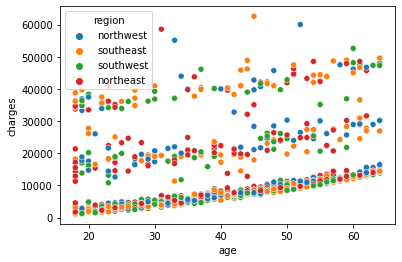

In [54]:
sns.scatterplot(x = 'age', y = 'charges', data = df, hue = 'region')

<AxesSubplot:xlabel='age', ylabel='charges'>

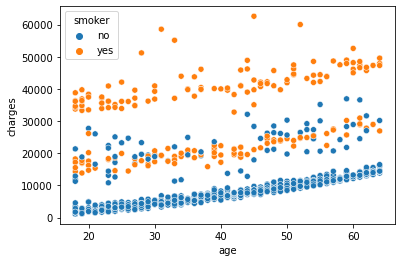

In [53]:
sns.scatterplot(x = 'age', y = 'charges', data = df, hue = 'smoker')

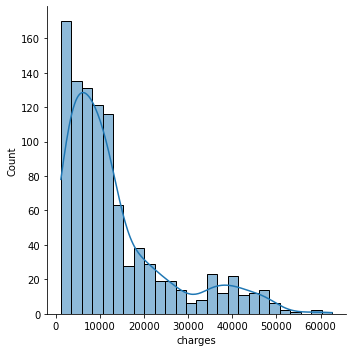

In [21]:
# Distribution of the response
sns.displot(x='charges', data = df, kde = True)

- We can see that the lowest line has a 'charges' that ranges from 0 up to about 15,000 
- The middle from 15,000 up to 30,000
- The highest line from 30k onwards.

- Use if else condition to create the bins.

In [83]:
def cluster(x):
    if x < 15000:
        return 'low'
    elif x < 30000:
        return 'middle'
    else:
        return 'high'
### apply the function to the dataframe
df['charges_bins'] = df['charges'].map(cluster)

In [84]:
print(df.shape)
df['charges_bins'].value_counts()

(1003, 9)


low       734
middle    149
high      120
Name: charges_bins, dtype: int64

---
**<h4>Question 2:** Create a function to classify BMI and Age into bins to understand the correlation.</h4>

In [85]:
def bmi_category(bmi):
    if bmi < 18.5:
        return 'under-weight'
    elif bmi >= 18.5 and bmi < 25:
        return 'normal-weight'
    elif bmi >= 25 and bmi <= 30:
        return 'over-weight'
    elif bmi > 30.0:
        return "obese"
    
def age_category(age):
    age_dict = {
        0: '0-9',
        1: '10-19',
        2: '20-29',
        3: '30-39',
        4: '40-49',
        5: '50-59',
        6: '60-69',
        7: '70-79',
        8: '80-89',
        9: '90-99',
        10: '100-200'
    }
    return age_dict[age//10]

In [86]:
df['cbmi'] = df['bmi'].apply(lambda x: "none")
df['cage'] = df['age'].apply(lambda x: "none")

In [87]:
for idx, row in df.iterrows():
    df.at[idx, 'cbmi'] = bmi_category(row['bmi'])
    df.at[idx, 'cage'] = age_category(row['age'])

In [88]:
by_bmi = df.groupby(by='cbmi').size()
print (by_bmi)
print ('-'*80)

by_age = df.groupby(by='cage').size()
print (by_age)
print ('-'*80)

cbmi
normal-weight    175
obese            518
over-weight      298
under-weight      12
dtype: int64
--------------------------------------------------------------------------------
cage
10-19    106
20-29    206
30-39    192
40-49    208
50-59    208
60-69     83
dtype: int64
--------------------------------------------------------------------------------


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           1003 non-null   int64  
 1   sex           1003 non-null   object 
 2   bmi           1003 non-null   float64
 3   children      1003 non-null   int64  
 4   smoker        1003 non-null   object 
 5   region        1003 non-null   object 
 6   id            1003 non-null   int64  
 7   charges       1003 non-null   float64
 8   charges_bins  1003 non-null   object 
 9   cbmi          1003 non-null   object 
 10  cage          1003 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 86.3+ KB


In [58]:
#sns.pairplot(df, size=2)

In [86]:
#df.cbmi.notnull()

In [102]:
#df[df.cbmi.notnull()]
#nan_in_col  = df[df['cbmi'].isnull()]
#nan_in_col


---
**<h4>Question 3:** Create a function that performs dummification of 'categorical variables' feature and replaces the original feature with its dummy features. </h4>

---
- we will use `.get_dummies` to dummify 'categorical variables'.

- Keep `drop_first=True` parameter.

In [90]:
def dummy_cat_creator(data=None):
  # Create a dummy variable for categorical variables
  dummies = pd.get_dummies(data=df, columns=['smoker', 'sex', 'region'], drop_first=True)
  # Return the dummy variable
  return dummies

In [91]:
train_dummy_v = dummy_cat_creator(data=df)
train_dummy_v.head()

,age,bmi,children,id,charges,charges_bins,cbmi,cage,smoker_yes,sex_male,region_northwest,region_southeast,region_southwest
0,24,23.65500,0,693,2352.96845,low,normal-weight,20-29,0,1,1,0,0
1,28,26.51000,2,1297,4340.44090,low,over-weight,20-29,0,0,0,1,0
2,51,39.70000,1,634,9391.34600,low,obese,50-59,0,1,0,0,1
3,47,36.08000,1,1022,42211.13820,high,obese,40-49,1,1,0,1,0
4,46,28.90000,2,178,8823.27900,low,over-weight,40-49,0,0,0,0,1


In [92]:
def drop_vars(data=None):
  # Drop the mentioned columns
  col_drop = data.drop(data[['charges_bins', 'cbmi', 'cage']], axis=1)

  # Return the modified dataframe
  return col_drop

In [139]:
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

In [140]:
dupl = list(df[df.duplicated()==True].index)
print(dupl)
print("Shape Before: ", df.shape)
df.drop(df.index[dupl], inplace=True)
print("Shape After: ", df.shape)

[]
Shape Before:  (1003, 8)
Shape After:  (1003, 8)


In [142]:

"""
df['z_bmi'] = np.abs(stats.zscore(df['bmi']))
outlBmi = list(np.where(np.abs(df['z_bmi']) > 3)[0])
print("BMI Outliers: ", outlBmi)
print("Total outlier BMI: ", len(outlBmi), "\n")
df['z_charges'] = np.abs(stats.zscore(df['charges']))
outlCharges = list(np.where(np.abs(df['z_charges']) > 3)[0])
print("Charges Outliers: ", outlCharges)
print("Total outlier Charges: ", len(outlCharges))

"""


'\ndf[\'z_bmi\'] = np.abs(stats.zscore(df[\'bmi\']))\noutlBmi = list(np.where(np.abs(df[\'z_bmi\']) > 3)[0])\nprint("BMI Outliers: ", outlBmi)\nprint("Total outlier BMI: ", len(outlBmi), "\n")\ndf[\'z_charges\'] = np.abs(stats.zscore(df[\'charges\']))\noutlCharges = list(np.where(np.abs(df[\'z_charges\']) > 3)[0])\nprint("Charges Outliers: ", outlCharges)\nprint("Total outlier Charges: ", len(outlCharges))\n\n'

In [110]:
outl = list(set(outlBmi + outlCharges))

In [143]:
print(df.shape)
#df1=df.drop(df.index[list(outl)], inplace=True)
#print(df1.shape)

(1003, 8)


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1003 entries, 0 to 1002
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1003 non-null   int64  
 1   sex       1003 non-null   int32  
 2   bmi       1003 non-null   float64
 3   children  1003 non-null   int64  
 4   smoker    1003 non-null   int32  
 5   region    1003 non-null   int32  
 6   id        1003 non-null   int64  
 7   charges   1003 non-null   float64
dtypes: float64(2), int32(3), int64(3)
memory usage: 58.8 KB


In [153]:
df2=df[['age', 'bmi', 'smoker', 'charges']]

In [209]:
df3=df[['age', 'bmi', 'smoker', 'charges']]

In [145]:
df1 = df[['age', 'bmi', 'smoker', 'charges']]

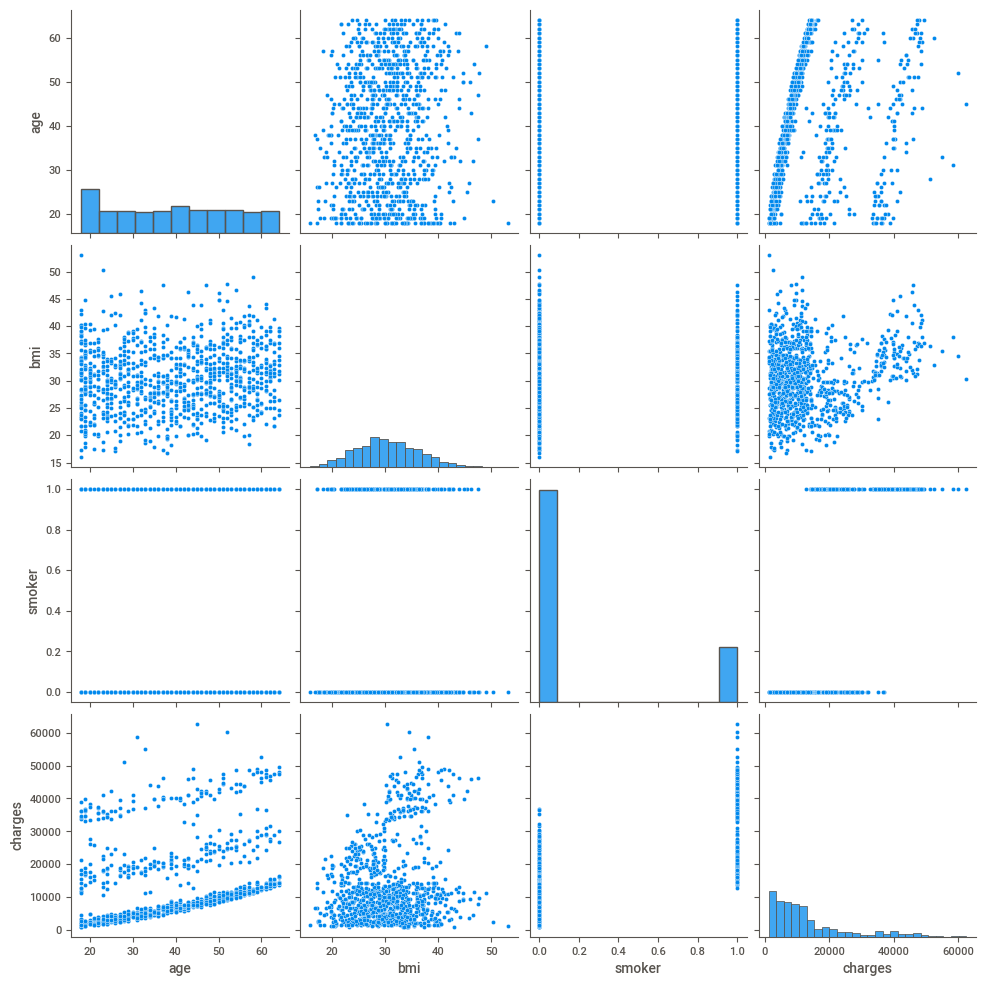

In [146]:
sns.pairplot(df1)

In [155]:
dfUsed = np.log10(df2[['age', 'charges']])
dfUsed = dfUsed.join(df2[['smoker', 'bmi']])
dfUsed = dfUsed[['age', 'bmi', 'smoker', 'charges']]

In [156]:
X = dfUsed.iloc[:, :-1].values
y = dfUsed.iloc[:, -1].values

In [210]:
X = df3.iloc[:, :-1].values
y = df3.iloc[:, -1].values

In [211]:
scores=[] #to store r squared
rmse_list=[] #to store RMSE
lrmodel = LinearRegression()
cv = KFold(n_splits=10, random_state=42, shuffle=True)
for train_index, test_index in cv.split(X):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    lrmodel.fit(X_train, y_train)
    y_predict = lrmodel.predict(X_test)
    scores.append(lrmodel.score(X_test, y_test))
    rmse_fold = rmse(y_test, y_predict)
    rmse_list.append(rmse_fold)

In [157]:
scores=[] #to store r squared
rmse_list=[] #to store RMSE
lrmodel = LinearRegression()
cv = KFold(n_splits=10, random_state=42, shuffle=True)
for train_index, test_index in cv.split(X):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    lrmodel.fit(X_train, y_train)
    y_predict = lrmodel.predict(X_test)
    scores.append(lrmodel.score(X_test, y_test))
    rmse_fold = rmse(y_test, y_predict)
    rmse_list.append(rmse_fold)

In [215]:
 prediction = lrmodel.predict(df2)

In [221]:
res = pd.DataFrame(prediction)
res.index = df2.index
res.index = df2['id']
res.columns = ["charges"]
res.to_csv("medical_cost_prediction_results", index = True, header = False)

In [212]:
lm = smf.ols(formula='charges ~ age + bmi + smoker', data = df2).fit()
comparison = pd.DataFrame({"y_test": y_test, "y_predict": y_predict})
print("Summary: ", lm.summary())
print("R Squared Mean: ", np.mean(scores))
print("RMSE mean: ", np.mean(rmse_list))

PatsyError: Error evaluating factor: NameError: name 'charges' is not defined
    charges ~ age + bmi + smoker
    ^^^^^^^

In [158]:
lm = smf.ols(formula='charges ~ age + bmi + smoker', data = dfUsed).fit()
comparison = pd.DataFrame({"y_test": y_test, "y_predict": y_predict})
print("Summary: ", lm.summary())
print("R Squared Mean: ", np.mean(scores))
print("RMSE mean: ", np.mean(rmse_list))

Summary:                              OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     997.9
Date:                Sun, 27 Mar 2022   Prob (F-statistic):          6.08e-300
Time:                        23:47:15   Log-Likelihood:                 196.52
No. Observations:                1003   AIC:                            -385.0
Df Residuals:                     999   BIC:                            -365.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6613      0.064     25.88

In [182]:
def prediction(age, bmi, smoker):
    whatif = np.log10(np.array([[age]]))
    whatif = np.append(whatif, [bmi, smoker]) #status smoker, 0: non smoker, 1: smoker
    status = "smoker" if smoker==1 else "non-smoker"
    print("Health insurance cost prediction for age:", age, "y.o., BMI:", bmi,", and", status, np.power(10, lrmodel.predict(df2[whatif])))

In [193]:
#prediction(df2.age([1, 2, 3]).array)
prediction(df2.iloc[1])

TypeError: prediction() missing 2 required positional arguments: 'bmi' and 'smoker'

In [205]:
#data = [61,35,1]
#new_data = pd.DataFrame([data],columns=['age', 'bmi', 'smoker'])
prediction(61,35,1)

KeyError: "None of [Float64Index([1.7853298350107671, 35.0, 1.0], dtype='float64')] are in the [columns]"

In [201]:
df2.index[1]

1

In [162]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       335 non-null    int64  
 1   sex       335 non-null    object 
 2   bmi       335 non-null    float64
 3   children  335 non-null    int64  
 4   smoker    335 non-null    object 
 5   region    335 non-null    object 
 6   id        335 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 18.4+ KB


In [217]:
le = LabelEncoder()
test['sex'] = le.fit_transform(test['sex'])
test['smoker'] = le.fit_transform(test['smoker'])
test['region'] = le.fit_transform(test['region'])


df2=test[['age', 'bmi', 'id', 'smoker']]

In [218]:
df2.to_numpy()

array([[4.5000e+01, 2.5175e+01, 7.6400e+02, 0.0000e+00],
       [3.6000e+01, 3.0020e+01, 8.8700e+02, 0.0000e+00],
       [6.4000e+01, 2.6885e+01, 8.9000e+02, 1.0000e+00],
       ...,
       [3.4000e+01, 3.2800e+01, 1.1280e+03, 0.0000e+00],
       [1.9000e+01, 3.0250e+01, 5.0300e+02, 1.0000e+00],
       [4.1000e+01, 3.3550e+01, 1.1970e+03, 0.0000e+00]])

In [180]:
def prediction(age, bmi, smoker):
    whatif = np.log10(np.array([[age]]))
    whatif = np.append(whatif, [bmi, smoker]) #status smoker, 0: non smoker, 1: smoker
    status = "smoker" if smoker==1 else "non-smoker"
y_predict_new = np.power(10, lrmodel.predict(df2))
y_predict_new

array([1.77252893e+59, 6.02900672e+47, 1.50366265e+84, 3.37239290e+60,
       5.58967910e+26, 1.93137543e+45, 1.10003455e+26, 3.67164421e+83,
       3.22114894e+37, 2.35308540e+64, 5.71379256e+40, 1.46727472e+54,
       6.93684308e+38, 1.84903683e+61, 1.36335509e+79, 3.37313630e+62,
       2.72778840e+64, 3.29183288e+62, 3.45550355e+60, 2.32175308e+57,
       5.10670365e+33, 5.36033395e+56, 1.19557081e+26, 8.93114710e+29,
       4.42337004e+65, 5.93732890e+70, 2.78658983e+78, 1.95621675e+36,
       6.43561882e+61, 6.30452627e+24, 7.65356752e+52, 3.97978669e+74,
       4.48270217e+28, 1.18487574e+40, 1.03003490e+35, 2.06872157e+59,
       4.09909020e+28, 5.20962881e+56, 6.97831474e+68, 2.92985404e+48,
       1.17305559e+26, 8.16814875e+29, 2.19463932e+73, 1.33083302e+77,
       9.46976068e+43, 1.35981921e+77, 4.42437500e+28, 5.12832430e+33,
       2.55558001e+57, 2.72262876e+41, 1.90883394e+82, 6.25346065e+24,
       8.69879513e+52, 6.04276085e+24, 2.16311138e+73, 4.61376688e+65,
      

In [179]:
y_predict_new_1 = lrmodel.predict(df2)
y_predict_new_1

array([59.24859333, 47.78024577, 84.17715041, 60.52793817, 26.74738688,
       45.2858667 , 26.04140632, 83.56486059, 37.50801081, 64.37163769,
       40.75692447, 54.16651144, 38.84116187, 61.26694556, 79.13460898,
       62.52803389, 64.43581068, 62.51743778, 60.53851134, 57.36581603,
       33.70814066, 56.72919185, 26.0775753 , 29.95090724, 65.64575327,
       70.77359111, 78.44507305, 36.29141697, 61.80859031, 24.79965246,
       52.88386392, 74.5998598 , 28.65153989, 40.07367281, 35.01285194,
       59.31570204, 28.61268748, 56.71680678, 68.84375055, 48.46684598,
       26.06931859, 29.91212364, 73.34136316, 77.12412357, 43.976339  ,
       77.13348117, 28.64585193, 33.70997548, 57.40748948, 41.43498843,
       82.28076815, 24.79612042, 52.9394591 , 24.78123541, 73.33507888,
       65.66405565, 40.09894752, 42.07947942, 75.88243851, 69.49947552,
       82.26012637, 40.17995502, 79.72639032, 55.41753117, 68.21185104,
       37.54766595, 29.27231577, 68.19132394, 33.70178758, 29.94

In [168]:
prediction(df2)

TypeError: prediction() missing 2 required positional arguments: 'bmi' and 'smoker'

In [93]:
data_dummy_drop = drop_vars(data=train_dummy_v)
data_dummy_drop.head()

,age,bmi,children,id,charges,smoker_yes,sex_male,region_northwest,region_southeast,region_southwest
0,24,23.65500,0,693,2352.96845,0,1,1,0,0
1,28,26.51000,2,1297,4340.44090,0,0,0,1,0
2,51,39.70000,1,634,9391.34600,0,1,0,0,1
3,47,36.08000,1,1022,42211.13820,1,1,0,1,0
4,46,28.90000,2,178,8823.27900,0,0,0,0,1



---
**<h4>Question 4:** Create a function to calculates the inter quantile range and then drops off the values outside 5th to 95th quantile values.</h4>

---

<details>

**<summary>Hint:</summary>**

- Calculate Q1 and Q3 using `.quantile` method of a dataframe.

- Calculate the IQR using Q1 and Q3.

- Remove the rows which have values **<Q1-1.5*0IQR** or **>Q3+1.5*IQR** in their respective columns.

</details>

In [23]:
"""def iqr_checker(data=None):
  # Calculate Q1 and Q3 as 5th and 95th percentile
  Q1 = data.quantile(0.05)
  Q3 = data.quantile(0.95)

  # Calculate the IQR
  IQR = Q3 - Q1

  # Filter out the values outside of the IQR
  car_out = data[~((data < (Q1 - 1.5*IQR)) | (data > (Q3 + 1.5*IQR))).any(axis=1)]

  # Return the reduced dataframe
  return car_out"""

In [25]:
#data_dummy_iqr = iqr_checker(data=data_dummy_drop)
#data_dummy_iqr.head()

,age,bmi,children,id,charges,smoker_yes,sex_male,region_northwest,region_southeast,region_southwest
0,24,23.65500,0,693,2352.96845,0,1,1,0,0
1,28,26.51000,2,1297,4340.44090,0,0,0,1,0
2,51,39.70000,1,634,9391.34600,0,1,0,0,1
3,47,36.08000,1,1022,42211.13820,1,1,0,1,0
4,46,28.90000,2,178,8823.27900,0,0,0,0,1


In [26]:
#data_dummy_iqr.head()

,age,bmi,children,id,charges,smoker_yes,sex_male,region_northwest,region_southeast,region_southwest
0,24,23.65500,0,693,2352.96845,0,1,1,0,0
1,28,26.51000,2,1297,4340.44090,0,0,0,1,0
2,51,39.70000,1,634,9391.34600,0,1,0,0,1
3,47,36.08000,1,1022,42211.13820,1,1,0,1,0
4,46,28.90000,2,178,8823.27900,0,0,0,0,1


In [27]:
#data_dummy_iqr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1003 entries, 0 to 1002
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1003 non-null   int64  
 1   bmi               1003 non-null   float64
 2   children          1003 non-null   int64  
 3   id                1003 non-null   int64  
 4   charges           1003 non-null   float64
 5   smoker_yes        1003 non-null   uint8  
 6   sex_male          1003 non-null   uint8  
 7   region_northwest  1003 non-null   uint8  
 8   region_southeast  1003 non-null   uint8  
 9   region_southwest  1003 non-null   uint8  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 51.9 KB


<a name = Section52></a>
### **5.2 Post Profiling Report**

In [114]:
profile = ProfileReport(df=data_dummy_iqr)
profile.to_file(output_file='Post Profiling Report.html')
print('Accomplished!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


**Observations**:

- After pre-processing our data, we have **1003 observations** with **13 features** (**8 categorical + 5 numeric**)

- There are **no missing values** present in the dataset.

- We have our **new** binary dummy **feature** as **sex, smoker, region** with unique **values as 0 or 1**.

- There is a **high correlation** among the features. We may have to **filter out** the **necessary** features for **building** our **prediction model**.

<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---


---
**<h4>Question 5:** Create a function that checks the distribution of the target feature.

---

<details>

**<summary>Hint:</summary>**

- Plot a 10x7 inches figure

- Plot a kdeplot/histplot for the `Sales_in_thousands` variable.

- Add additional cosmetics like grid and title to the plot.

- Set x, y labels of size 14, ticks of size 12 and title label of size 16.

</details>

In [94]:
def plot_target():
  # Create a figure of 10 x 7 inches
  fig = plt.figure(figsize=(10, 7))

  # Plot a kde plot on Sales_in_thousands using sns.kdeplot
  sns.kdeplot(x = (train_dummy_v['charges']), shade=True)

  # Set x, y labels of size 14, ticks of size 12 and title label of size 16.
  plt.xlabel(xlabel='Charges', size=14)
  plt.ylabel(ylabel='Density', size=14)
  plt.xticks(size=12)
  plt.yticks(size=12)
  plt.title(label='Medical Cost', size=16)

  # Put a grid
  plt.grid(b=True)

  # Display the plot
  plt.show()

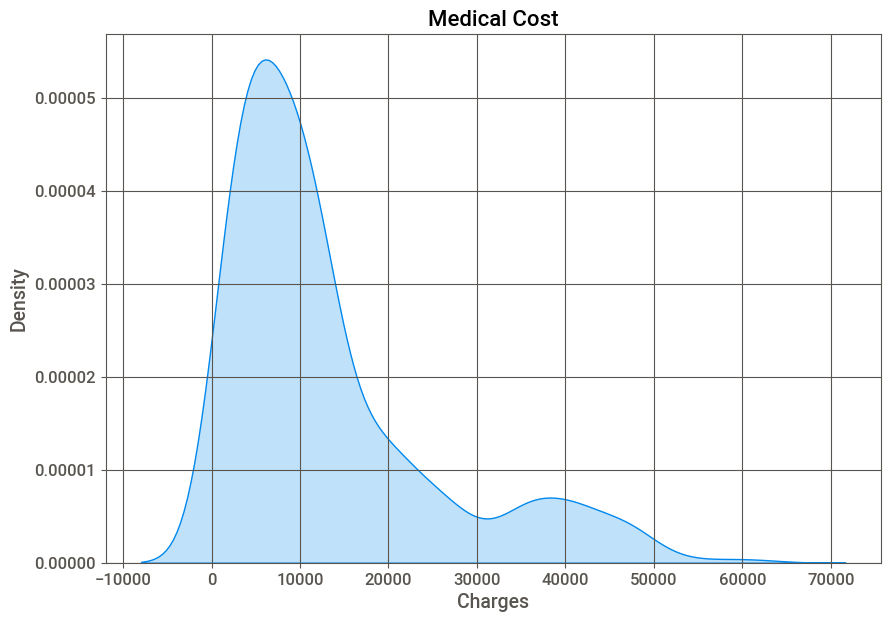

In [95]:
plot_target()

**Observations:**

- There is **skewness** in our target variable.

- We have to **transform** it so that we can use it for **model building**.

<a name = Section7></a>

---
# **7. Data Post-Processing**
---

<a name = Section71></a>
### **7.1 Feature Extraction**

- In this section, we will select some of the features that will be used for model development.

In [29]:
data_dummy_iqr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1003 entries, 0 to 1002
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1003 non-null   int64  
 1   bmi               1003 non-null   float64
 2   children          1003 non-null   int64  
 3   id                1003 non-null   int64  
 4   charges           1003 non-null   float64
 5   smoker_yes        1003 non-null   uint8  
 6   sex_male          1003 non-null   uint8  
 7   region_northwest  1003 non-null   uint8  
 8   region_southeast  1003 non-null   uint8  
 9   region_southwest  1003 non-null   uint8  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 51.9 KB


In [74]:
def feature_extract(data=None):
  df = data_dummy_iqr[['age', 'bmi', 'id', 'charges', 'smoker_yes', 'sex_male', 'region_northwest', 'region_southwest', 'region_southeast']]
  return df

In [79]:
df = feature_extract(data=train_dummy_v)
df.head()

,age,bmi,id,charges,smoker_yes,sex_male,region_northwest,region_southwest,region_southeast
0,1.15627,1.15170,693,2.17064,0,1,1,0,0
1,1.20363,1.18709,1297,2.23815,0,0,0,0,1
2,1.36910,1.30328,634,2.31724,0,1,0,1,0
3,1.34811,1.27696,1022,2.45535,1,1,0,0,1
4,1.34251,1.21308,178,2.31108,0,0,0,1,0


<a name = Section72></a>
### **7.2 Feature Transformation**

- In this section, we will apply **transformations** to some features.


---
**<h4>Question 10:** Create a function that applies log transformation on the given features.</h4>

---

- Feature: `Sales_in_thousands` - log(1+x)

- Feature: `_year_resale_value` - log(x)

- Feature: `Price_in_thousands` - log(x)


<details>

**<summary>Hint:</summary>**

- log(1+x) transformation can be applied using `np.log1p()` method.

- log(x) transformation can be applied using `np.log()` method.

</details>

In [118]:
>>> import numpy as np
>>> from sklearn.preprocessing import power_transform

In [76]:
def transform_features(df=None):
  df['charges'] = np.log1p(df['charges'])
  df['bmi'] = np.log(df['bmi'])
  df['age'] = np.log(df['age'])
  return df

In [77]:
df = transform_features(df=data_dummy_iqr)
df.head()

,age,bmi,children,id,charges,smoker_yes,sex_male,region_northwest,region_southeast,region_southwest
0,1.15627,1.15170,0,693,2.17064,0,1,1,0,0
1,1.20363,1.18709,2,1297,2.23815,0,0,0,1,0
2,1.36910,1.30328,1,634,2.31724,0,1,0,0,1
3,1.34811,1.27696,1,1022,2.45535,1,1,0,1,0
4,1.34251,1.21308,2,178,2.31108,0,0,0,0,1


<a name = Section73></a>
### **7.3 Feature Scaling**

- In this section, we will perform **standard scaling** over the selected features.


---
**<h4>Question 11:** Create a function that scales the features of dataframe using a standard scaler.</h4>

---

<details>

**<summary>Hint:</summary>**

- Instantiate a scaler using StandardScaler()

- Fit and transform dataframe using `.fit_transform()` method of the **StandardScaler**.

- Create a new dataframe using output of scaled dataframe and column names of the input dataframe.

</details>

In [34]:
def scale_data(data=None):
  sc = StandardScaler()
  scaled_data = sc.fit_transform(data_dummy_iqr)
  scaled_dataframe = pd.DataFrame(data=scaled_data, columns=data.columns)
  return scaled_dataframe

In [35]:
scaled_data = scale_data(data=data_dummy_iqr)
scaled_data.head()

,age,bmi,children,id,charges,smoker_yes,sex_male,region_northwest,region_southeast,region_southwest
0,-1.07433,-1.17252,-0.91750,0.06762,-1.46232,-0.50840,0.99107,1.75421,-0.59002,-0.57159
1,-0.68032,-0.60354,0.74361,1.63085,-0.79374,-0.50840,-1.00901,-0.57006,1.69487,-0.57159
2,0.85229,1.41292,-0.08695,-0.08508,0.04915,-0.50840,0.99107,-0.57006,-0.59002,1.74949
3,0.64353,0.93549,-0.08695,0.91912,1.69063,1.96696,0.99107,-0.57006,1.69487,-0.57159
4,0.58856,-0.17252,0.74361,-1.26528,-0.01899,-0.50840,-1.00901,-0.57006,-0.59002,1.74949


---
**<h4>Question 12:** Create a function that creates two dataframes for dependent and independent features.</h4>

---

<details>

**<summary>Hint:</summary>**

- Create input dataframe X by dropping only "Sales_in_thousands" feature from axis 1.

- Create target series by using "Sales_in_thousands" as value.

</details>


In [72]:
def seperate_Xy(data=None):
  X = df.drop(labels=['charges'], axis=1)
  y = df['charges']
  return X, y

In [73]:
X, y = seperate_Xy(data=scaled_data)
X.head()

""
0
1
2
3
4


<a name = Section74></a>
### **7.4 Data Preparation**

- Now we will **split** our **data** in **training** and **testing** part for further development.

---
**<h4>Question 13:** Create a function that splits the data into train and test datasets while keeping random state as 42.</h4>

---

<details>

**<summary>Hint:</summary>**

- Use `train_test_split()` to split the dataset.

- Use `test_size` of **0.25**

- Use `random_state` equal to **42**.

</details>

In [42]:
from sklearn.model_selection import train_test_split

def split(X,y):
    return train_test_split(X, y, test_size=0.20, random_state=1)

In [43]:
X_train, X_test, y_train, y_test=split(X,y)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (802, 9)
y_train shape:  (802,)

Test cases as below
X_test shape:  (201, 9)
y_test shape:  (201,)


<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---

- In this section we will develop a Linear Regression model, check it's performance using various performance metrics.

---
**<h4>Question 14:** Create a function that instantiates a Linear Regression model.</h4>

---

<details>

**<summary>Hint:</summary>**

- Instantiate a Linear Regression model using LinearRegression().

</details>

In [44]:
def model_generator_lr():
  return LinearRegression()

In [45]:
clf = model_generator_lr()

In [46]:
def train_n_eval(clf=None):

  # Extracting model name
  model_name = type(clf).__name__

  # Fit the model on train data
  clf.fit(X_train, y_train)

  # Make predictions using test data
  y_pred = clf.predict(X_test)

    # Make predictions using train data
  y_pred_train = clf.predict(X_train)

  # Calculate test accuracy of the model
  clf_r2 = r2_score(y_test, y_pred)

  # Calculate train accuracy of the model
  clf_r2_train = r2_score(y_train, y_pred_train)

  # Display the accuracy of the model
  print('Performance Metrics for', model_name, ':')
  print('[R2-Score Train]:', clf_r2_train)
  print('[R2-Score Test]:', clf_r2)

In [47]:
train_n_eval(clf=clf)

Performance Metrics for LinearRegression :
[R2-Score Train]: 0.7776051119189861
[R2-Score Test]: 0.7156656092726635


In [48]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score

clf = LinearRegression(normalize=True)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(r2_score(y_test,y_pred))

0.7156656092726634


In [66]:
test = pd.read_csv(filepath_or_buffer="C:/Users/Mani/Desktop/GCDAI/MACHINE LEARNING/Term 4/Medical-Cost-Prediction/test_data.csv")
print('Data Shape:', test.shape)

def dummy_test_creator(data=None):
  # Create a dummy variable for categorical variables
  dummies = pd.get_dummies(data=test, columns=['smoker', 'sex', 'region'], drop_first=True)
  # Return the dummy variable
  return dummies

test_dummy_v = dummy_test_creator(data=test)
test_dummy_v.head()

Data Shape: (335, 7)


,age,bmi,children,id,smoker_yes,sex_male,region_northwest,region_southeast,region_southwest
0,45,25.17500,2,764,0,0,0,0,0
1,36,30.02000,0,887,0,0,1,0,0
2,64,26.88500,0,890,1,0,1,0,0
3,46,25.74500,3,1293,0,1,1,0,0
4,19,31.92000,0,259,1,1,1,0,0


In [67]:
def scale_data(data=None):
  sc = StandardScaler()
  scaled_data = sc.fit_transform(test_dummy_v)
  scaled_dataframe = pd.DataFrame(data=test_dummy_v, columns=data.columns)
  return scaled_dataframe

scaled_data_1 = scale_data(data=test_dummy_v)
scaled_data_1.head()

,age,bmi,children,id,smoker_yes,sex_male,region_northwest,region_southeast,region_southwest
0,45,25.17500,2,764,0,0,0,0,0
1,36,30.02000,0,887,0,0,1,0,0
2,64,26.88500,0,890,1,0,1,0,0
3,46,25.74500,3,1293,0,1,1,0,0
4,19,31.92000,0,259,1,1,1,0,0


In [68]:
y_pred_new = clf.predict(scaled_data_1)

In [69]:
y_pred = clf.predict(X_test)

In [55]:
test_dummy_v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               335 non-null    int64  
 1   bmi               335 non-null    float64
 2   children          335 non-null    int64  
 3   id                335 non-null    int64  
 4   smoker_yes        335 non-null    uint8  
 5   sex_male          335 non-null    uint8  
 6   region_northwest  335 non-null    uint8  
 7   region_southeast  335 non-null    uint8  
 8   region_southwest  335 non-null    uint8  
dtypes: float64(1), int64(3), uint8(5)
memory usage: 12.2 KB


In [70]:
import numpy as np
import pandas as pd

my_array = y_pred_new

pred1 = pd.DataFrame(my_array, columns = ['charges'])

print(pred1)
print(type(pred1))

      charges
0    73.97706
1    64.84295
2   100.51948
3    75.51529
4    45.53359
5    69.38697
6    38.95306
7   104.94403
8    47.74608
9    80.92927
10   55.77874
11   71.63117
12   55.61318
13   86.04074
14  102.97559
15   85.41140
16   88.54168
17   84.11095
18   76.57328
19   73.62871
20   47.70407
21   75.28860
22   43.16825
23   52.33163
24   82.00435
25   89.43611
26   98.35821
27   53.74825
28   77.28331
29   41.72391
30   69.93113
31   92.71740
32   48.22915
33   51.90539
34   52.04403
35   81.76424
36   43.68233
37   73.84603
38   83.74715
39   69.12119
40   42.64652
41   47.62653
42   93.70893
43   91.72838
44   64.14922
45   92.86469
46   47.72341
47   47.86184
48   78.69969
49   63.02913
50  102.78772
51   41.34578
52   76.30386
53   39.71671
54   92.77442
55   84.12519
56   54.62766
57   62.51707
58   94.69083
59   88.44249
60  100.33508
61   64.44575
62  100.35998
63   69.89393
64   85.92489
65   52.37809
66   45.03088
67   83.42867
68   46.73379
69   52.03489
70   7

In [62]:
import numpy as np
import pandas as pd

my_array = y_pred

pred_t = pd.DataFrame(my_array, columns = ['charges'])

print(pred_t)
print(type(pred_t))

     charges
0    8.97928
1    9.35237
2    8.15054
3    8.06220
4    9.35347
5    7.84956
6    8.09912
7    9.42979
8   10.74960
9   10.70023
10  10.82391
11   9.37792
12   9.55956
13   7.85667
14   9.98295
15  10.58086
16   9.01479
17   8.86972
18   8.93960
19   8.89686
20   7.94807
21   9.29267
22   8.15092
23   9.30902
24  10.85737
25   9.63927
26  10.51923
27   8.94770
28   8.05882
29  10.69906
30  10.75273
31   9.23983
32   8.54021
33   8.59250
34   8.93438
35   9.18521
36   8.11822
37   7.93026
38  10.42890
39   9.51749
40   8.88282
41   8.98407
42   9.09480
43   8.80707
44   9.37202
45  10.94686
46   9.29639
47  10.29936
48   9.71183
49   9.25252
50   9.36283
51   9.47534
52   8.52812
53  10.45293
54   8.07941
55   8.74146
56   7.81201
57   8.13857
58   9.91384
59   8.11734
60   9.07048
61   8.32790
62   8.88508
63   9.70927
64   8.17991
65   9.95547
66   7.92848
67   8.49543
68   9.29367
69   9.12735
70   9.20251
71   9.31941
72  10.63952
73  10.29461
74   8.03790
75   9.31622

In [60]:
pred1.describe()

,charges
count,335.00000
mean,69.72163
std,18.76703
min,36.07661
25%,52.52430
50%,71.31714
75%,85.35348
max,106.28792


In [63]:
pred_t.describe()

,charges
count,201.00000
mean,9.20292
std,0.86497
min,7.58258
25%,8.59250
50%,9.20251
75%,9.51749
max,11.18724


**Observations:**

- We can see that our **R-squared score** is around **0.42**.

- We have a **small dataset** so it can affect our model training as well.

- This can be improved by trying **different combination** of **features** that give the **best values** for **R-squared** and **Adjusted R-squared** scores.

**<h4>NOTE:**</h4>

- You may try different combinations of features that affect the target variable's prediction.

<a name = Section9></a>

---
# **9. Conclusion**
---

- We have **analyzed** and understood the **different features** that can **influence** the **sales volume** of the **cars**.

- **Price**, **resale price** and **engine size** plays an important role in **determining** the **sales volume** of the cars.

- We have also built a **predictor** to **estimate** the **sales volume** based on those **influential features**.

- The model **performs decently** as shown by our **evaluation metrics**.

- This can help the **dealership** to **improve** their overall **sales**.

- Since the data is less, **getting more records** can **improve** the model's **performance**.

- We can also use other **regression** techniques and **compare** them with our trained model.